# Teil 2 der Semesterarbeit: Parallel- und Zentralprojektionen

Deadline: Mittwoch,  21.10.2020

### 1. Parallelprojektion

### 2. Zenralprojektion

## Theorie

Im Theorieteil müssen die mathematischen Grundlagen beschrieben werden, insbesondere die Idee und Anwendung der homogenen Koordinaten.  
Aufgaben:
Sie verstehen die Matrizendarstellungen von Parallelprojektionen und Zentralprojektionen.
Sie können Zentralprojektionen mit numpy berechnen und mit matplotlib visualisieren.

Schreiben Sie eine Python Klasse für ein Parallelepiped (Spat).

Erstellen Sie eine Pythonfunktion, um ein Parallelepiped mit einer Paralleprojektion  auf der 𝑥𝑦
x
y
-Ebene darzustellen.
Die Funktion soll als Argumente ein Parallelepiped und einen Richtungsvektor verwenden; die Funktion sollte eine Matplotlib-Graphik erstellen.
Erstellen Sie eine Pythonfunktion, um ein Parallelepiped mit einer Zenralprojektion  auf der 𝑥𝑦
x
y
-Ebene darzustellen.
Die Funktion soll als Argumente ein Parallelepiped und ein Projektionszentrum (Kamera) verwenden; die Funktion sollte eine Matplotlib-Graphik erstellen.
Hilfsmittel: Numpy, Matplotlib, Jupyter Notebook (oder Python-IDE).  

-------------------------------------------------


Wieso Peojektionen und was sind die Kameramodelle?  
Nachdem alle Objekte einer Szenerie mittels der besprochenen Transformationen im 3D-Weltkoordinatensystem platziert sind, muss die Szenerie aus verschiedenen Blickwinkeln auf eine 2D-Bildfläche projiziert werden.
Dazu verwendet man eine virtuelle Kamera, die wie folgt definiert ist:  
• Ihre Position ist durch die Koordinaten eines Punkts gegeben.   
• Der Bildausschnitt ist rechtwinklig.  
• Ihr Schärfebereich ist unendlich groß.  

Man verwendet zwei Typen von Projektionen, die **Parallel-** und die **Zentralprojektion** :
![im2](im2.png)

xxx

**Theorie:**

Mit der allgemeineren Form der homogenen Koordinaten, man kann damit eine weitere Klasse von nicht-linearen Abbildungen von $R2$ nach $R2$ als homogene Matrizen darstellen, und zwar **Zentralprojektionen**.

Beispiel:
imagexx1

Um einen Punkt $P$ zu projizieren, wird er mit dem Nullpunkt verbunden und
dann auf den Schnittpunkt $P′$ der Verbindungsgeraden mit der durch $y = d$
gegebenen Geraden abgebildet. Diese Abbildung ist nicht linear. Zum Bei-
spiel haben die beiden Punkte $(xP, yP + 1$) und $(xP, yP − 1)$ dieselbe Entfer-
nung von $P$. Aber ihre Projektionen werden nicht dieselbe Entfernung von $P′$
haben, d.h. Streckenverhältnisse auf Geraden bleiben nicht erhalten.

Obwohl die **Zentralprojektion nicht linear** ist, *lässt sie sich jedoch durch eine **homogene Matrix** darstellen*. 

Dazu muss man sich lediglich überlegen, wie die Koordinate $x′P$ des Punktes $P′$ berechnet wird.
Man hat es offenbar mit zwei ähnlichen rechtwinkligen Dreiecken zu tun, so dass die Verhältnisse $x′P/xP$ und $d/yP$ übereinstimmen. Das bedeutet, dass man $x′P$ durch $xP * (d/yP)$ berechnen kann. Jetzt multiplizieren wir $[xP, yP, 1]^T$ mit der folgenden Matrix:

M = $$\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1/d & 0 \end{pmatrix}$$

Das Ergebnis ist $[xP, yP, yP/d]^T$ 

Somit haben wir homogene Koordinaten für den Punkt $P′$ berechnet haben. Die homogene Matrix $M$ beschreibt also unsere **Zentralprojektion**.

In [2]:
################

In [52]:
# Beispiel vom Buch

In [41]:
# Parallelprojektion: Cube (Wurfel)

In [1]:
from scipy import *
from matrices import Matrix
from vectors import Vector
from canvas import Canvas
from homog import *
from math import pi
from time import sleep

In [2]:
left, right, bottom, top, near, far = -4, 4, -4, 4, 1, 20

In [3]:
# homogene Projektion, ich bekomme zurück eine homogene Matrix, die beschreibt wie meine Kamera sich bewegen wird

In [4]:
def projectionMatrix (xRotation, yRotation, distance):
    # bewege mich zuerst nach x, dann nach y und dann zurück Richtung 0,0 (distance)
    # dafür benötige ich eine Drehmatrix
    
    rotationMatrix = yRotationMatrix(yRotation) * xRotationMatrix(xRotation)
    
    # nun brauche ich die Richtung -> translation (um diesen Vektor von 0,0 weg zu nehmen)
    
    translation = rotationMatrix * (distance * Vector(0, 0, 1, 1))
    
    # vorher die Verschiebung dieser Vektor
    cameraMatrix = translationMatrix(-translation) * rotationMatrix 
    
    #ich muss von rechts nach links denken, erst skalieren, 20 / x Koordinaten, 20 / y Koordinaten und 20 / z Koord.
    ndcMatrix = scalingMatrix(20 / (right-left), 20 / (top-bottom), 20 / (far-near)) * translationMatrix ( -(left + right)/ 2, -(top +bottom) / 2, -(far + near) /2 )
    
    return ndcMatrix * cameraMatrix.invert()

In [5]:
# Auf eine Drehung, spielt der Ache der Drehung keine Rolle (0), d.h. nur die andere zwei Achsen
# yRotation -> gibt zurück eine Drehungsmatrix, wo der Achse der Drehung keine Rolle spielt (0)
yRotationMatrix(pi/6)

M[[0.8660254037844387, 0, 0.49999999999999994, 0], [0, 1, 0, 0], [-0.49999999999999994, 0, 0.8660254037844387, 0], [0, 0, 0, 1]]

In [6]:
# für einen Würfel, ich nehme die Koordinaten für einen Würfel (mit -2, 2 x und y Koordinaten)
cubePoints = [Vector(x, y, z) for x in [-2, 2] for y in [-2, 2] for z in [-2, 2]]

In [7]:
cubePoints

[v(-2, -2, -2),
 v(-2, -2, 2),
 v(-2, 2, -2),
 v(-2, 2, 2),
 v(2, -2, -2),
 v(2, -2, 2),
 v(2, 2, -2),
 v(2, 2, 2)]

In [8]:
# um die Kanten auch zu zeichnen, eine Funktion die auf alle Paare geht und sagt wenn eure Abstand 4 ist seid ihr eine Kante

cubeEdges = []
for i,  P1 in enumerate(cubePoints):
    for P2 in cubePoints[i+1:]:
        if (P1 - P2).norm() == 4:
            #dort wo der Abstand gleich 4 ist
            cubeEdges.append([P1, P2])

In [9]:
cubeEdges  # das ist die Liste aller Kanten des Würfels

[[v(-2, -2, -2), v(-2, -2, 2)],
 [v(-2, -2, -2), v(-2, 2, -2)],
 [v(-2, -2, -2), v(2, -2, -2)],
 [v(-2, -2, 2), v(-2, 2, 2)],
 [v(-2, -2, 2), v(2, -2, 2)],
 [v(-2, 2, -2), v(-2, 2, 2)],
 [v(-2, 2, -2), v(2, 2, -2)],
 [v(-2, 2, 2), v(2, 2, 2)],
 [v(2, -2, -2), v(2, -2, 2)],
 [v(2, -2, -2), v(2, 2, -2)],
 [v(2, -2, 2), v(2, 2, 2)],
 [v(2, 2, -2), v(2, 2, 2)]]

In [10]:
def drawCube(c, xAngleDeg = 20, yAngleDeg = 30, distance = 10, edges = cubeEdges):

        M = projectionMatrix(xAngleDeg / 180 * pi, yAngleDeg / 180 * pi, distance)
    
        c.clear()
        for P1, P2 in edges:
            P1= lower(M * lift(P1))
            P2 = lower(M * lift(P2))
            c.drawSegment(P1, P2)
            
c = Canvas()
            
            

<IPython.core.display.Javascript object>

In [11]:
# Zeichnen den Wurfel

drawCube(c)

<IPython.core.display.Javascript object>

In [12]:
# Drehung des "Camerawurfels"

for angle in range(-20, 20):
    drawCube(c, yAngleDeg=angle)
    sleep(0.1)

<IPython.core.display.Javascript object>

In [13]:
######################################
# AUFGABE 1
# Erstellen Sie eine Pythonfunktion, um ein Parallelepiped mit einer Paralleprojektion  auf der 𝑥𝑦 Ebene 
#darzustellen.
######################################

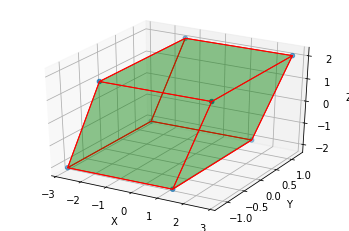

In [22]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt

points = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])


# Um ein Parallelepiped zu erhalten, habe ich die Einheitsmatrix mit der folgenden Matrix multipliziert:

P = [[2.06498904e-01 , -6.30755443e-07 ,  1.07477548e-03],
 [1.61535574e-06 ,  1.18897198e-01 ,  7.85307721e-06],
 [7.08353661e-02 ,  4.48415767e-06 ,  2.05395893e-01]]

Z = np.zeros((8,3))
for i in range(8): Z[i,:] = np.dot(points[i,:],P)
Z = 10.0*Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = [-1,1]

X, Y = np.meshgrid(r, r)

# plot vertices
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

# Liste der Seitenpolygone der Figur
verts = [[Z[0],Z[1],Z[2],Z[3]],
 [Z[4],Z[5],Z[6],Z[7]], 
 [Z[0],Z[1],Z[5],Z[4]], 
 [Z[2],Z[3],Z[7],Z[6]], 
 [Z[1],Z[2],Z[6],Z[5]],
 [Z[4],Z[7],Z[3],Z[0]]]

# plot Seiten
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='green', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [74]:
# Die Funktion nimmt als Argumente ein Parallelepiped und einen Richtungsvektor für die Projektionsrichtung

# (a, b, c, d, e, f, g, h) sind die Kanten des Parallepipedes. Epfohlehne Werte: 0, 1, 2, 3, 4, 5, 6, 7

# (p, q, w) ist der Richtungsvektor (Werte zwischen 0-3) Epfohlene Werte: 0, 1, 2

def my_func(a, b, c, d, e, f, g, h, p, q, w):
    points = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])
    
    Z = np.zeros((8,3))
    for i in range(8): Z[i,:] = np.dot(points[i,:],P)
    Z = 10.0*Z
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    r = [-1,1]

    X, Y = np.meshgrid(r, r)

    # plot vertices
    ax.scatter3D(Z[:, p], Z[:, q], Z[:, w])

    # Liste der Seitenpolygone der Figur
    verts = [[Z[a],Z[b],Z[c],Z[d]],
     [Z[e],Z[f],Z[g],Z[h]], 
     [Z[a],Z[b],Z[f],Z[e]], 
     [Z[c],Z[d],Z[h],Z[g]], 
     [Z[b],Z[c],Z[g],Z[f]],
     [Z[e],Z[h],Z[d],Z[a]]]

    # plot Seiten
    ax.add_collection3d(Poly3DCollection(verts, 
     facecolors='green', linewidths=1, edgecolors='r', alpha=.25))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

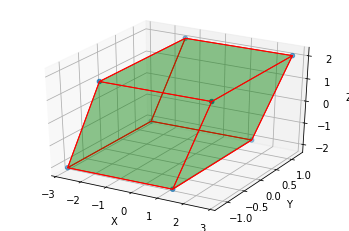

In [77]:
my_func(0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2)

In [70]:
# Zentralprojektion: 

# https://towardsdatascience.com/inverse-projection-transformation-c866ccedef1c
    
# https://hackernoon.com/programmers-guide-to-homogeneous-coordinates-73cbfd2bcc65

# https://www8.cs.umu.se/kurser/TDBD19/VT05/camera-4.pdf

# http://www.cs.toronto.edu/~jepson/csc420/notes/imageProjection.pdf

# https://www.scratchapixel.com/lessons/3d-basic-rendering/perspective-and-orthographic-projection-matrix/projection-matrices-what-you-need-to-know-first


## Parallel Projektion

zwei Untertypen:
- bei **orthogonaler Projektion** stehen die Projektionsstrahlen senkrecht auf der Projektionsebene (vgl. obiges Beispiel)  
- bei **schiefwinkliger Projektion** nicht.  

Die **Projektionsrichtung** wird durch einen normierten **Vektor** p gegeben.

Für Vektoren p , die parallel zu den Koordinatenachsen sind, ergeben sich als Bilder die sechs Hauptrisse (Grundriss, Aufriss, Seitenriss) eines Objekts.